# Examples for lecture topics

## Generative vs. discriminative

You will often find a visualization similar to this one:

<img src="images/gen_disc.png">

But what is labeled here as discriminative is called predictor in the lecture. It also doesn't reflect that points with the same color still have different probabilities.

An example:

We want to predict if there will be a traffic jam in a given street, given the weather and rough time:
  - $X_1 = \{"Friesweg", "Hegelstraße", "Lommerweg" \}$  
  - $X_2 = \{"Sun", "Rain", "Snow" \}$
  - $X_3 = \{"Morning", "Noon", "Evening", "Night" \}$  
  - $Y = \{0,1 \}$  (Traffic jam, no = 0, yes = 1)



# Exercise 0 - Getting started (15 Points)


This exercise is meant to get you familiar with Python. Most of the following exercises are inspired by the highly recommended lecture "Skriptsprachen und Anwendungen (ASQ)" (FMI-BI0058) by Emanuel Barth.


Import needed modules:


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Variables, Types

In this lab, we will mostly use two basic types of variables: **numbers** and **strings**. These variables can be grouped in [**lists**](https://www.w3schools.com/python/python_lists.asp), [**dictionaries**](https://www.w3schools.com/python/python_dictionaries.asp) or [**sets**](https://www.w3schools.com/python/python_sets.asp).

### Task 1 (1 Point)

Create several variables:
- `x` has the value of 3
- `y` has the value of $2^{100}$
- `a` is a string with the text "pretty little string"
- `l` is a list, that holds `x,y` and `a`
- `d` is a dictionary with the name and phone number of three (imaginary) people
- `s` is a set with 5 numbers

In [44]:
# TODO: create variables
x = 3
y = 2**100
a = "pretty little string"
l = [x,y,a]
d = {
    'Person1' : 1234,
    'Person2' : 4231,
    'Person3' : 1324
}
s = set([1,2,3,4,5])
s = {1,2,3,4,5}

In [45]:
type(l) # You can verify the type with python

list

In [46]:
# Tuples are basically immutable list
t = (x,y,a)
t


(3, 1267650600228229401496703205376, 'pretty little string')

In [47]:
dict = {t:1} # Works if all elements of t are hashable, which holds ture for all immutable data types
dict

{(3, 1267650600228229401496703205376, 'pretty little string'): 1}

https://docs.python.org/3/glossary.html

Hashable
An object is hashable if it has a hash value which never changes during its lifetime (it needs a `__hash__()` method), and can be compared to other objects (it needs an `__eq__()` method). Hashable objects which compare equal must have the same hash value.

Hashability makes an object usable as a dictionary key and a set member, because these data structures use the hash value internally.

Most of Python’s immutable built-in objects are hashable; mutable containers (such as lists or dictionaries) are not; immutable containers (such as tuples and frozensets) are only hashable if their elements are hashable. Objects which are instances of user-defined classes are hashable by default. They all compare unequal (except with themselves), and their hash value is derived from their id().

In [48]:
dict = {l: 1} # Doesn't work

TypeError: unhashable type: 'list'

## Branches and Loops

Similar to other programming languages, Python has [**for**](https://www.w3schools.com/python/python_for_loops.asp)- and [**while**](https://www.w3schools.com/python/python_while_loops.asp)- loops, as well as [**if-else**](https://www.w3schools.com/python/python_conditions.asp) conditioning.

### Task 2 (1 Point)
Use a for loop to iterate over the dictionary `d` and print the persons and their phone numbers.

In [3]:
# TODO: iterate over d
for p in d:
    print(f'Person: {p}\tNumber: {d[p]}')

Person: Person1	Number: 1234
Person: Person2	Number: 4231
Person: Person3	Number: 1324


### Task 3 (1 Points)
Use a for loop to iterate over the set `s` and print only the even numbers.

In [7]:
# TODO: iterate over s, print even numbers
for i in s:
    if i%2==0:
        print(i)

2
4


In [8]:
[x for x in s if x%2==0]

[2, 4]

### Task 4 (2 Points)
Calculate the first 10 powers of 2: ($2^0,2^1,2^2,\dots,2^9)$ 
and store them in a list
- using a for loop
- using a while loop

Compare the results.

In [9]:
# TODO: store first 10 powers of 2 with for loop
l1 = [2**i for i in range(10)]

# TODO: store first 10 powers of 2 with while loop
l2 = []
i = 0
while i<10:
    l2.append(2**i)
    i += 1
    
assert l1 == l2

[Functions](https://www.w3schools.com/python/python_functions.asp) are a convenient way to encapsulate calculation steps.

### Task 5 (2 Points)
Create a function, that returns a list of the first $n$ [fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [13]:
# TODO: write function, that outputs list of first n fibonacci numbers
def fib(n):
    if n < 1:
        return []
    if n == 1:
        return [0]
    elif n == 2:
        return [0,1]
    else: 
        i = 2
        ret = [0,1]
        while i < n:
            ret.append(ret[-1]+ret[-2])
            i += 1
        return ret
    
fib(5)

[0, 1, 1, 2, 3]

## Classes

[**Classes**](https://www.w3schools.com/python/python_classes.asp) are a convenient way to group calculations and attributes into a single instance. In this lab we will use classes to represent algorithms.

Below you find an example for an iterative algorithm, that calculates the [moving average](https://en.wikipedia.org/wiki/Moving_average) for a sequence of numbers.

In [14]:
class moving_average():
    def __init__(self, k):
        self.k = k
        self.datapoints = None
        self.averages = None
        
    def mean(self, datapoints):
        return sum(datapoints)/len(datapoints)
        
    def fit(self,datapoints):
        self.datapoints = datapoints
        self.averages = []
        if self.k < len(self.datapoints):
            for i in range(len(self.datapoints)-self.k+1): # here was an error
                avg = self.mean(self.datapoints[i:i+self.k])
                self.averages.append(avg)

### Task 6 (1 Point)

Create a toy dataset and use the `moving_average` class to calculate the moving average.

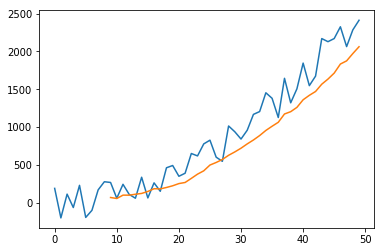

In [26]:
# TODO: create own dataset and use moving average
n = 50
k = 10


datapoints = np.arange(1,n+1,1)**2 
noisy_datapoints = datapoints + np.random.random(n)*500-250
x_values = np.arange(0,n,1)


alg = moving_average(k)
alg.fit(noisy_datapoints)


plt.plot(x_values, noisy_datapoints)
plt.plot(x_values[k-1:],alg.averages)

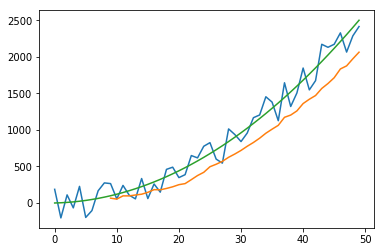

In [27]:
plt.plot(x_values, noisy_datapoints)
plt.plot(x_values[k-1:],alg.averages)
plt.plot(x_values, datapoints)

### Task 7 (2 Points)

Create your own class that implements the (not efficient) approximation of pi from a [circle with known radius and area](https://academo.org/demos/estimating-pi-monte-carlo/). 

Use the [`random`](https://docs.python.org/3/library/random.html) package for the generation of random numbers. 

 - Area of unit circle: $\pi*r^2 = \pi$
 - Area of square around unit circle: $2^2 = 4$
 - Probability that point sampled from square is in circle = Area_circle / Area_square = $\pi/4$
 - Approximate probability trough random experiment

Point in unit circle if $x^2 + y^2 \leq 1$ by pythagoras:

<img src="images/unit-circle.svg" style="width:400px"/>

Since $ r^2 = x^2+ y^2 $ and $ r= 1$

In [30]:
# TODO: Implement pi approximation within class
import math
class pi_approximation():

    def __init__(self):
        self.pi = None
        self.count = 0

    def fit(self, n_iterations=1000):
        for _ in range(n_iterations):
            x = random.random()*2-1
            y = random.random()*2-1
            if 1 > x**2+y**2:
                self.count += 1
        self.pi = 4*self.count/n_iterations

alg = pi_approximation()
alg.fit(1000000)
alg.pi

3.143384

## Numpy and Matplotlib

In the context of scientific computing, [NumPy](https://numpy.org/) is probably the most important package in Python. 

### Task 8 (1 Point)
Install and import numpy. Create a numpy array with 10 numbers. Multiply this array by 10 and calculate the mean of the array.

In [34]:
# TODO: create numpy array, multiply by 10 and calculate mean
a = np.random.rand(10)
np.mean(a*10)

2.538269544459481

[Matplotlib](https://matplotlib.org/) is a package for plotting and visualization in Python.

### Task 9 (2 Points)

Use numpy to calculate the function 
\begin{equation}
f(x) = x^2-10\sin(2x)
\end{equation}
for $x=1,\dots,50$. 

Use matplotlib to draw the function.

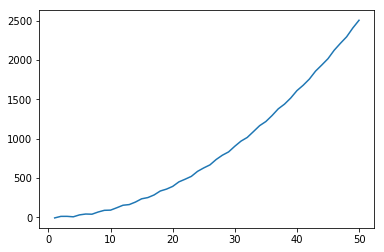

In [35]:
# TODO: calculate and plot the function values
def f(x):
    return x**2-10*np.sin(2*x)

x_values = np.arange(1,51)
y_values = f(x_values)

plt.plot(x_values, y_values)